In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from dateutil.parser import parse

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the test data in memory
test_df = pd.read_csv("/content/drive/MyDrive/Maersk/test_data_maersk.csv")

# Time Series Modeling and prediction for data where ***Manufacturer*** = ***X1*** and ***Product Size*** = ***Small*** and ***Product Type*** = ***Powder***

In [4]:
# Loading the training data in memory
df = pd.read_csv("/content/drive/MyDrive/Maersk/x1_small_powder_outlier_removed_df.csv")
df.head()

,Month of Sourcing,Sourcing Cost
0,Feb-21,107.22
1,Feb-21,145.79
2,Feb-21,89.24
3,Feb-21,107.60
4,Feb-21,49.18


In [5]:
# Converting the Month of Sourcing data from strinf to datetime format for training
df["Month of Sourcing"] = df["Month of Sourcing"].str.replace('-','-20')
df["Month of Sourcing"]= df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
df.head()

,Month of Sourcing,Sourcing Cost
0,2021-02-25,107.22
1,2021-02-25,145.79
2,2021-02-25,89.24
3,2021-02-25,107.60
4,2021-02-25,49.18


In [6]:
# Ordering the training data by Month of Sourcing (oldest to newest)
data = df
data.sort_values(by=["Month of Sourcing"])

,Month of Sourcing,Sourcing Cost
49745,2020-07-25,56.52
56102,2020-07-25,186.62
56103,2020-07-25,89.49
56104,2020-07-25,135.29
56105,2020-07-25,114.90
...,...,...
83515,2021-05-25,64.46
83514,2021-05-25,150.00
83513,2021-05-25,150.00
83525,2021-05-25,150.98


(0.0, 500.0)

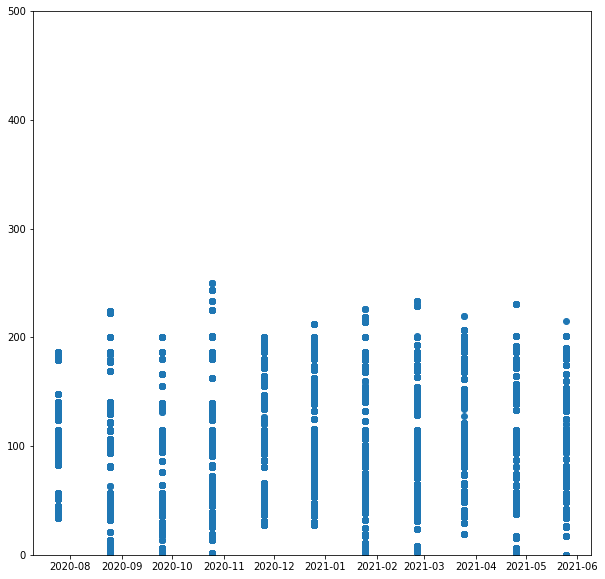

In [7]:
# Plottting the training data to visualize the scatter plot of the grouped time-series
plt.figure(figsize=(10,10))
plt.scatter(data["Month of Sourcing"], data["Sourcing Cost"])
plt.ylim((0,500))

In [8]:
# renaming the columns to symbolize the timestamp and the target
data = data.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

In [9]:
# instantiating an object of Prophet Class (Using the Prophet Forecasting model developed by Facebook)
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# Making prediction on the filtered data
test_df = test_df[(test_df["Manufacturer"]=="X1") & (test_df["Product Size"]=="Small") & (test_df["Product Type"]=="Powder") ]
test_df["Month of Sourcing"] = test_df["Month of Sourcing"].str.replace('-','-20')
test_df["Month of Sourcing"]= test_df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
test_df.reset_index(drop=True,inplace=True)
test_df = test_df.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

pred = model.predict(test_df[["ds"]])
pred = pred["yhat"].to_list()

test_df["yhat"] = pred

print(test_df)

   ProductType Manufacturer Area Code  ...         ds       y        yhat
0         NTM1           X1        A1  ... 2021-06-25  103.68  105.836965
1         NTM1           X1        A2  ... 2021-06-25  169.15  105.836965
2         NTM1           X1       A28  ... 2021-06-25   47.99  105.836965
3         NTM1           X1       A29  ... 2021-06-25   56.52  105.836965
4         NTM1           X1        A3  ... 2021-06-25  151.02  105.836965
5         NTM1           X1       A34  ... 2021-06-25   95.00  105.836965
6         NTM1           X1        A7  ... 2021-06-25  141.32  105.836965
7         NTM2           X1       A10  ... 2021-06-25  144.89  105.836965
8         NTM2           X1       A11  ... 2021-06-25  143.08  105.836965
9         NTM2           X1       A16  ... 2021-06-25  132.60  105.836965
10        NTM2           X1       A26  ... 2021-06-25   38.66  105.836965
11        NTM2           X1       A28  ... 2021-06-25   97.74  105.836965
12        NTM2           X1       A29 

In [11]:
# Computing the Absolute Error in model's performance
diff_col = test_df["y"] - test_df["yhat"]
test_df["Absolute Error"] = diff_col
test_df["Absolute Error"]= test_df.apply(lambda x: abs(x["Absolute Error"]),axis=1)
print(test_df)

   ProductType Manufacturer Area Code  ...       y        yhat Absolute Error
0         NTM1           X1        A1  ...  103.68  105.836965       2.156965
1         NTM1           X1        A2  ...  169.15  105.836965      63.313035
2         NTM1           X1       A28  ...   47.99  105.836965      57.846965
3         NTM1           X1       A29  ...   56.52  105.836965      49.316965
4         NTM1           X1        A3  ...  151.02  105.836965      45.183035
5         NTM1           X1       A34  ...   95.00  105.836965      10.836965
6         NTM1           X1        A7  ...  141.32  105.836965      35.483035
7         NTM2           X1       A10  ...  144.89  105.836965      39.053035
8         NTM2           X1       A11  ...  143.08  105.836965      37.243035
9         NTM2           X1       A16  ...  132.60  105.836965      26.763035
10        NTM2           X1       A26  ...   38.66  105.836965      67.176965
11        NTM2           X1       A28  ...   97.74  105.836965  

In [12]:
print("The mean absolute error in Sourcing Cost for this model's prediction is  " + str(test_df["Absolute Error"].mean()))

The mean absolute error in Sourcing Cost for this model's prediction is  34.59544312966181
